# Digit Recognizer

In this competition, the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

## Dataset
The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).





# Code

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.python import keras
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

## Utils Functions

The function data_prep it's responsibly to reshape e normalizing the data that will be passed to the Neural Network

In [2]:
img_rows, img_cols = 28, 28
num_classes = 10


def data_prep(raw):
    out_y = keras.utils.np_utils.to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:, 1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y,x_as_array

## Loading the data and preprocessing

It's load the train and test dataset, and normalize and slip in train and validate datasets

In [3]:
train_file = "../data/train.csv"
test_file = "../data/test.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Split the data into training and validation sets
x_all, y_all, pixels = data_prep(train_df)
x_train, x_valid, y_train, y_valid = train_test_split(x_all, y_all, test_size=0.2, random_state=13)

print some pictures

                                                                   Random examples                                                                    


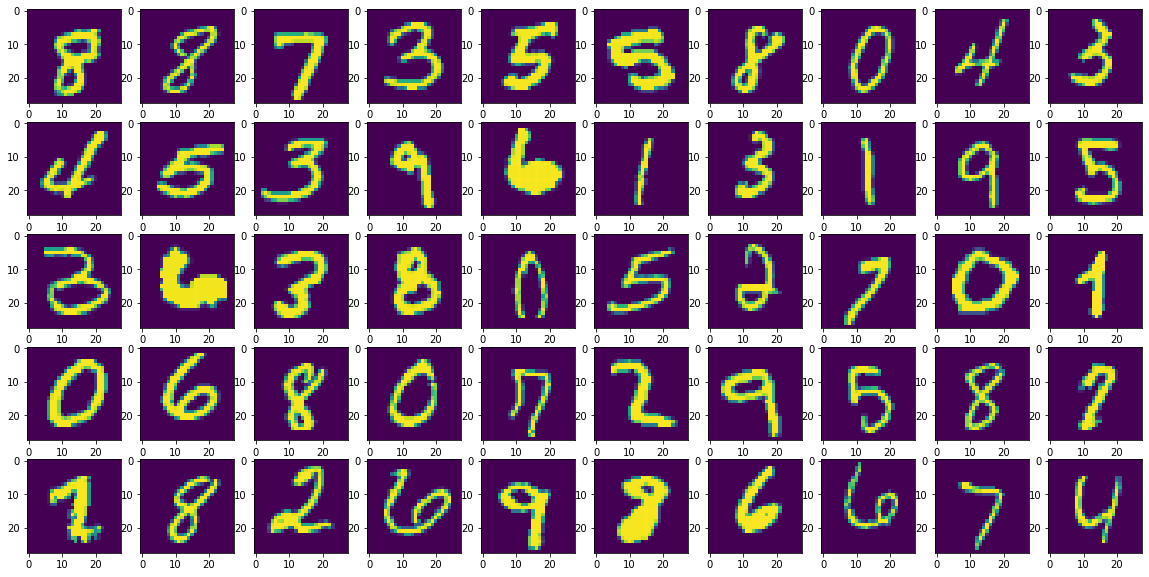

In [4]:
from matplotlib import pyplot as plt

index = np.random.randint(0, pixels.shape[0], 50)
plt.figure(figsize = (20, 10))

for i, idx in enumerate(index):
    plt.subplot(5, 10, i+1)
    plt.imshow(np.resize(pixels[idx], (28, 28, 1)))
print("Random examples".center(150))
plt.show()

## Building the model

Compar the models and evolutional of the project

### Using model v1
Base model capture at [deep-learning-from-scratch-daily](https://www.kaggle.com/code/dansbecker/deep-learning-from-scratch-daily)

Conv2D -> Conv2D -> Flatten -> Dense -> Dense => Compile('Adam')

Test loss: 0.08818254619836807

Test accuracy: 0.9829761981964111

In [5]:
from models.v1 import get_model as get_model_v1

# model_v1 = get_model_v1(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

### Using model v2

Conv2D -> Conv2D -> MaxPooling2D -> Dropout -> Flatten -> Dense -> Dense => Compile('Adam')

Test loss: 0.05307791009545326

Test accuracy: 0.988095223903656

In [6]:
from models.v2 import get_model as get_model_v2

# model_v2 = get_model_v2(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

## Using model v3

Conv2D -> Conv2D -> Dropout -> Flatten -> Dense -> Dense => Compile('Adam')

Test loss: 0.3998982310295105

Test accuracy: 0.8883333206176758

In [7]:
from models.v3 import get_model as get_model_v3

# model_v3 = get_model_v3(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

## Using model v4

Conv2D -> AveragePooling2D -> DepthwiseConv2D -> Conv2D -> Conv2D -> MaxPooling2D -> Flatten -> Dense -> Masking -> Dense => Compile('Adam')

Test loss: 0.07014783471822739

Test accuracy: 0.9829761981964111

In [8]:
from models.v4 import get_model as get_model_v4

model_v4 = get_model_v4(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

2022-03-30 01:00:12.259082: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-30 01:00:12.259762: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


2022-03-30 01:00:12.662912: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-03-30 01:00:13.060701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1050/1050 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.9087

2022-03-30 01:01:24.084980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1050/1050 [==============================] - 79s 75ms/step - loss: 0.2837 - accuracy: 0.9087 - val_loss: 0.0930 - val_accuracy: 0.9713
Epoch 2/10
1050/1050 [==============================] - 81s 77ms/step - loss: 0.0713 - accuracy: 0.9771 - val_loss: 0.0705 - val_accuracy: 0.9787
Epoch 3/10
1050/1050 [==============================] - 98s 93ms/step - loss: 0.0509 - accuracy: 0.9841 - val_loss: 0.0698 - val_accuracy: 0.9793
Epoch 4/10
1050/1050 [==============================] - 97s 93ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0597 - val_accuracy: 0.9842
Epoch 5/10
1050/1050 [==============================] - 104s 99ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0659 - val_accuracy: 0.9814
Epoch 6/10
1050/1050 [==============================] - 103s 98ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0547 - val_accuracy: 0.9839
Epoch 7/10
1050/1050 [==============================] - 100s 96ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0549 - val_acc

## Using model v5

Conv2D ->  DepthwiseConv2D -> Conv2D -> Flatten -> Dense -> Dense => Compile('Adam')

Test loss: 0.13858406245708466

Test accuracy: 0.9789285659790039

In [9]:
from models.v5 import get_model as get_model_v5

model_v5 = get_model_v5(img_rows, img_cols, num_classes, x_train, y_train, x_valid, y_valid)

Epoch 1/10


2022-03-30 01:16:53.639764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1050/1050 [==============================] - ETA: 0s - loss: 0.2860 - accuracy: 0.9085

2022-03-30 01:18:34.504778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1050/1050 [==============================] - 110s 102ms/step - loss: 0.2860 - accuracy: 0.9085 - val_loss: 0.0994 - val_accuracy: 0.9708
Epoch 2/10
1050/1050 [==============================] - 107s 101ms/step - loss: 0.0696 - accuracy: 0.9780 - val_loss: 0.0706 - val_accuracy: 0.9783
Epoch 3/10
1050/1050 [==============================] - 112s 107ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0700 - val_accuracy: 0.9798
Epoch 4/10
1050/1050 [==============================] - 102s 97ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0887 - val_accuracy: 0.9781
Epoch 5/10
1050/1050 [==============================] - 93s 89ms/step - loss: 0.0188 - accuracy: 0.9934 - val_loss: 0.0859 - val_accuracy: 0.9814
Epoch 6/10
1050/1050 [==============================] - 92s 88ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0970 - val_accuracy: 0.9798
Epoch 7/10
1050/1050 [==============================] - 91s 86ms/step - loss: 0.0110 - accuracy: 0.9959 - val_loss: 0.0832 - val

## Traning the model with the entire training set

In [10]:
model_v4.fit(x_all, y_all,
          batch_size=128,
          epochs=20,
          verbose=1)

Epoch 1/10


2022-03-30 01:33:08.942894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


329/329 [==============================] - 108s 325ms/step - loss: 0.0159 - accuracy: 0.9956
Epoch 2/10
329/329 [==============================] - 94s 286ms/step - loss: 0.0068 - accuracy: 0.9981
Epoch 3/10
329/329 [==============================] - 93s 284ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 4/10
329/329 [==============================] - 102s 309ms/step - loss: 0.0016 - accuracy: 0.9999
Epoch 5/10
329/329 [==============================] - 106s 322ms/step - loss: 9.8946e-04 - accuracy: 0.9999
Epoch 6/10
329/329 [==============================] - 109s 332ms/step - loss: 5.4497e-04 - accuracy: 1.0000
Epoch 7/10
329/329 [==============================] - 108s 328ms/step - loss: 4.0560e-04 - accuracy: 1.0000
Epoch 8/10
329/329 [==============================] - 104s 316ms/step - loss: 3.1508e-04 - accuracy: 1.0000
Epoch 9/10
329/329 [==============================] - 104s 317ms/step - loss: 2.4842e-04 - accuracy: 1.0000
Epoch 10/10
329/329 [==============================] - 10

## Submission
### Preparing the test data

In [11]:
## Prepare the test data
raw = test_df
num_images = raw.shape[0]
x_as_array = raw.values[:]
x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
x_test = x_shaped_array / 255

### Making predictions

In [13]:
pred = model_v4.predict(x_test)
pred = np.argmax(pred, axis=1)
pred = pd.Series(pred, name="Label")

2022-03-30 01:50:36.403928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [14]:
submission = pd.DataFrame(data={
    "ImageId": list(range(1, num_images+1)),
    "Label": pred})
# submission.ImageId = submission.ImageId.astype(int)
submission.to_csv("submission.csv", index=False)